In [1]:
from os import chdir
chdir('..')

In [8]:
# import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
sns.set()

In [34]:
df = pd.read_csv('./test_fixtures/results/all_timings.csv')
df = df.replace('migloveholes', 'miglove')
df_all_section = df[df.section == 'all']
df_pl = df[df.alg == 'polylidar']
df_pl_sec = df_pl[df_pl.section != 'all']
df.head()

,alg,holes,l2_norm,points,section,shape,time
0,polylidar,True,NaN,2000,delaunay,miglove,0.971
1,polylidar,True,NaN,2000,delaunay,miglove,0.919
2,polylidar,True,NaN,2000,delaunay,miglove,0.717
3,polylidar,True,NaN,2000,delaunay,miglove,0.718
4,polylidar,True,NaN,2000,delaunay,miglove,0.761


<IPython.core.display.Javascript object>


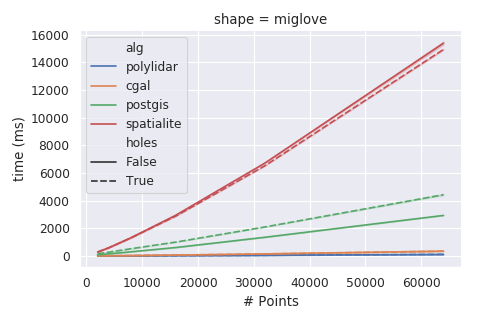

In [56]:
# fig = plt.Figure()
g = sns.relplot(x="points", y="time", hue="alg", style='holes',
            facet_kws=dict(sharex=True, legend_out=False),col="shape",
            kind="line", legend='brief', data=df_all_section,
            height=4, aspect=1.5)
g.set_ylabels("time (ms)")
g.set_xlabels("# Points")
# g.ax.legend(loc=2)
# g.despine(left=True)
# plt.legend(loc='upper left')
g.savefig('assets/pics/compare_algs_time.pdf')
# g.set(yscale="log")

<IPython.core.display.Javascript object>


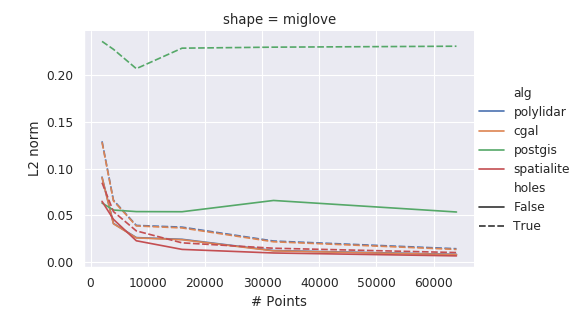

In [55]:
fig = plt.Figure((5,5))
g = sns.relplot(x="points", y="l2_norm", hue="alg", style='holes',
            facet_kws=dict(sharex=True),col="shape",
            kind="line", legend="full", data=df_all_section,
            height=4, aspect=1.5)
g.set_ylabels("L2 norm")
g.set_xlabels("# Points")
# g.set(yscale="log")

<IPython.core.display.Javascript object>


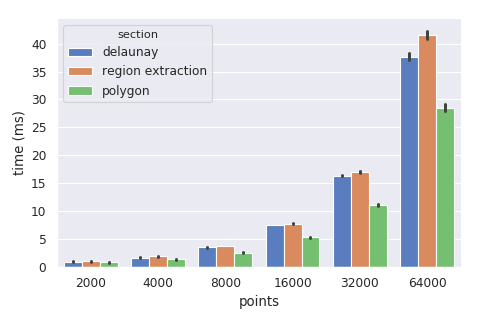

In [24]:
fig = plt.Figure((5,5))
df_pl_sec = df_pl_sec.replace('mesh', 'region extraction')
g = sns.catplot(x="points", y="time", hue="section", data=df_pl_sec, kind="bar", palette="muted",
                hue_order=["delaunay", "region extraction", "polygon"],  height=4, aspect=1.5, legend_out=False)

g.set_ylabels("time (ms)")
g.savefig('assets/pics/polylidar_decomposed.pdf')
# g.set(yscale="log")
# g.savefig("imgs/timing_results.pdf")

In [13]:
df_pl_sec_miglove = df_pl_sec[df_pl_sec['shape'] == 'miglove']

df_new = df_pl_sec_miglove.groupby([df_pl_sec_miglove['section'], df_pl_sec_miglove['points']]).mean()
df_new = df_new.reset_index()
df_delaunay = df_new[df_new['section'] == 'delaunay']
df_mesh = df_new[df_new['section'] == 'mesh']
df_polygon = df_new[df_new['section'] == 'polygon']

delaunay_diff = df_delaunay['time'].pct_change().reset_index()
mesh_diff = df_mesh['time'].pct_change().reset_index()
polygon_diff = df_polygon['time'].pct_change().reset_index()

values = []
names = ['delaunay_PctChange', 'mesh_PctChange', 'polygon_PctChange']
values.append(delaunay_diff.values[1:,1])
values.append(mesh_diff.values[1:, 1])
values.append(polygon_diff.values[1:, 1])

pd.DataFrame.from_items(zip(names, values))



/home/jeremy/miniconda3/envs/concave/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


,delaunay_PctChange,mesh_PctChange,polygon_PctChange
0,0.850006,0.884305,0.580735
1,1.150318,1.000899,0.986742
2,1.155723,1.044694,1.079273
3,1.170132,1.205207,1.142758
4,1.229350,1.357251,1.448084
